In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
import pickle

In [7]:
import seaborn as sns

In [6]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 2.4 MB/s eta 0:00:00 MB/s eta 0:00:01:01


In [9]:
df = pd.read_pickle('master_df_inverted.pkl')
df = df[df['Condition'] != 'Loaded']
df['Condition'] = df['Condition'].str.replace('Unloaded', 'Auto')
display(df)

,Frame,Dataset,Condition,angle,Percent Flexed
0,0,1,Auto,24.163856,-100.000000
1,1,1,Auto,21.735649,-93.750000
2,2,1,Auto,20.243762,-87.500000
3,3,1,Auto,18.229781,-81.250000
4,4,1,Auto,16.173049,-75.000000
...,...,...,...,...,...
529,41,5,Manual,17.851442,81.818182
530,42,5,Manual,18.862803,86.363636
531,43,5,Manual,21.279478,90.909091
532,44,5,Manual,24.481450,95.454545


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

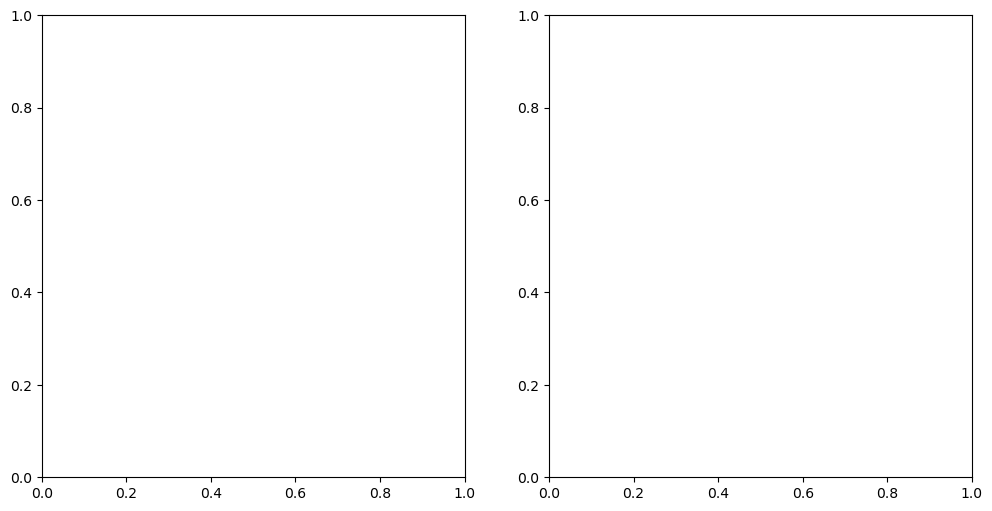

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
conditions = ['Auto', 'Manual']
datasets = [1,2,3,4,5]
for ds in datasets:
    for idc, con in enumerate(conditions):
        df_subset = df[(df['Dataset'] == ds) & (df['Condition'] == con)]
        axes[idc].plot(df_subset['Percent Flexed'], df_subset['angle'],'.-', label=con if ds == 1 else None, color='tab:blue' if con == 'Auto' else 'tab:orange')
for ax in axes:
    ax.legend()


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

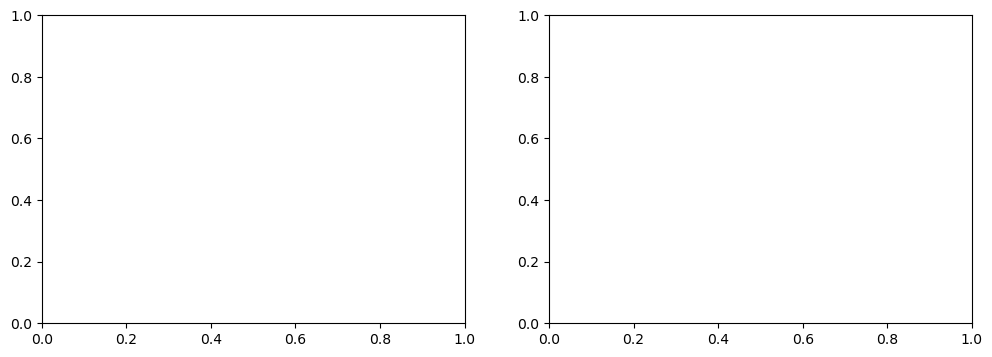

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
conditions = ['Auto', 'Manual']
datasets = [4]
for ds in datasets:
    for idc, con in enumerate(conditions):
        df_subset = df[(df['Dataset'] == ds) & (df['Condition'] == con)]
        axes[0].plot(df_subset['Percent Flexed'], df_subset['angle'],'.-', label=con if ds == 1 else None, color='tab:blue' if con == 'Auto' else 'tab:orange')

        ind = df_subset['Percent Flexed'] < 0
        axes[1].plot(df_subset['Percent Flexed'][ind], df_subset['angle'][ind].diff(),'.-', label=con if ds == 1 else None, color='tab:blue' if con == 'Auto' else 'tab:orange')
        ind = df_subset['Percent Flexed'] > 0
        axes[1].plot(df_subset['Percent Flexed'][ind], df_subset['angle'][ind].diff(),'.-', label=con if ds == 1 else None, color='tab:blue' if con == 'Auto' else 'tab:orange')
for ax in axes:
    ax.legend()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


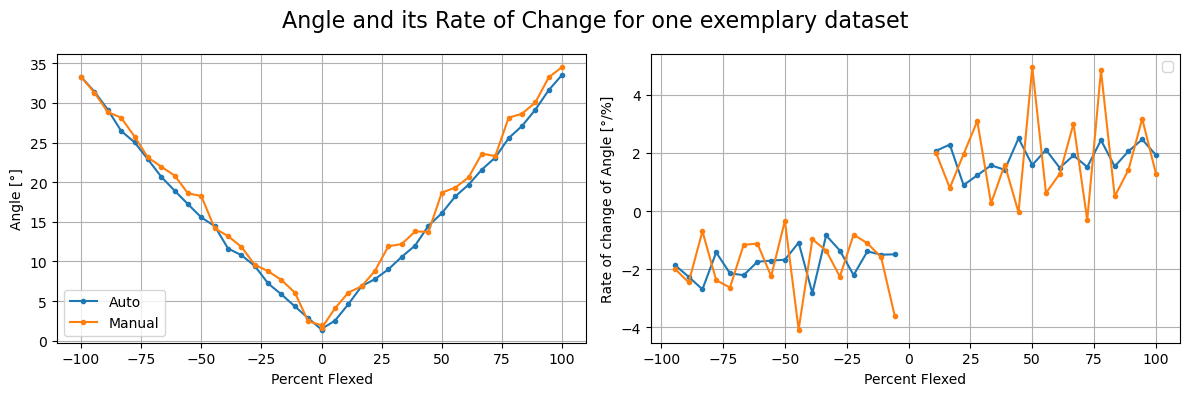

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
conditions = ['Auto', 'Manual']
datasets = [4]

for ds in datasets:
    for idc, con in enumerate(conditions):
        df_subset = df[(df['Dataset'] == ds) & (df['Condition'] == con)]
        
        # Convert to numpy arrays to avoid multi-dimensional indexing issues
        percent_flexed = df_subset['Percent Flexed'].to_numpy()
        angle = df_subset['angle'].to_numpy()
        
        axes[0].plot(percent_flexed, angle, '.-', 
                     label=con, 
                     color='tab:blue' if con == 'Auto' else 'tab:orange')
        
        # For negative Percent Flexed
        ind_neg = percent_flexed < 0
        axes[1].plot(percent_flexed[ind_neg], 
                     np.diff(angle[ind_neg], prepend=np.nan), '.-', 
                     label=con if ds == 1 and np.any(ind_neg) else None, 
                     color='tab:blue' if con == 'Auto' else 'tab:orange')
        
        # For positive Percent Flexed
        ind_pos = percent_flexed > 0
        axes[1].plot(percent_flexed[ind_pos], 
                     np.diff(angle[ind_pos], prepend=np.nan), '.-', 
                     color='tab:blue' if con == 'Auto' else 'tab:orange')

for ax in axes:
    ax.legend()
    ax.set_xlabel('Percent Flexed')
    ax.grid()
axes[0].set_ylabel('Angle [°]')
axes[1].set_ylabel('Rate of change of Angle [°/%]')

fig.suptitle('Angle and its Rate of Change for one exemplary dataset', fontsize=16)

#plt.grid()
plt.tight_layout()
plt.savefig('exemplary_dataset.svg', dpi=300)
plt.show()

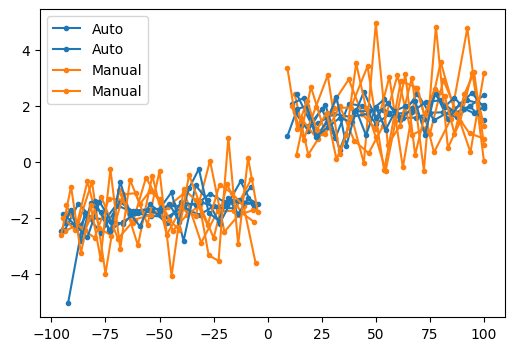

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
conditions = ['Auto', 'Manual']
datasets = [1,2,3,4,5]
for ds in datasets:
    for idc, con in enumerate(conditions):
        df_subset = df[(df['Dataset'] == ds) & (df['Condition'] == con)]
        ind = df_subset['Percent Flexed'] < 0
        ax.plot(df_subset['Percent Flexed'][ind], df_subset['angle'][ind].diff(),'.-', label=con if ds == 1 else None, color='tab:blue' if con == 'Auto' else 'tab:orange')
        ind = df_subset['Percent Flexed'] > 0
        ax.plot(df_subset['Percent Flexed'][ind], df_subset['angle'][ind].diff(),'.-', label=con if ds == 1 else None, color='tab:blue' if con == 'Auto' else 'tab:orange')
ax.legend()


0.7195773486729214
1.0017063464640967


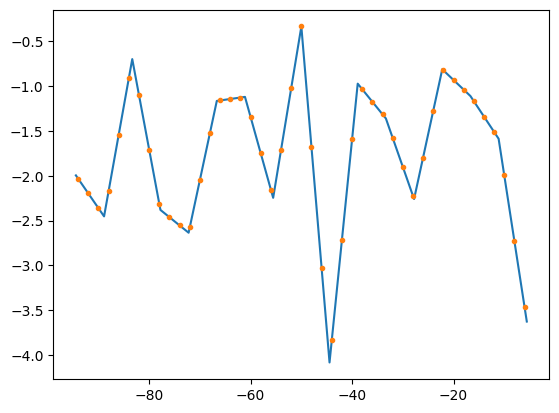

In [115]:
df_subset = df[(df['Dataset'] == 4) & (df['Condition'] == 'Manual')]

ind = df_subset['Percent Flexed'] < 0

x_interp = np.linspace(-100,0,51)
y_interp = np.interp(x_interp, df_subset['Percent Flexed'][ind], df_subset['angle'][ind].diff(), left=np.nan, right=np.nan)
ind_nan = np.where(np.isnan(y_interp))
x_interp = np.delete(x_interp, ind_nan)
y_interp = np.delete(y_interp, ind_nan)

plt.plot(df_subset['Percent Flexed'][ind], df_subset['angle'][ind].diff())
plt.plot(x_interp, y_interp,'.')
print(np.std(y_interp))
print(np.std(df_subset['angle'][ind].diff()))

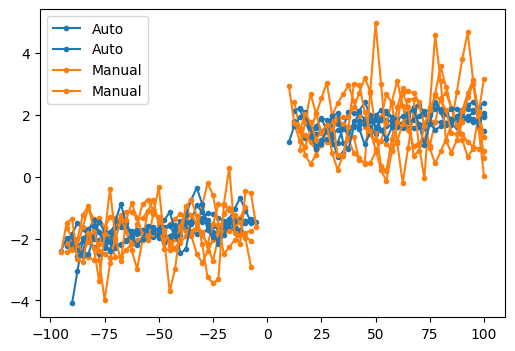

In [123]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
conditions = ['Auto', 'Manual']
datasets = [1,2,3,4,5]
for ds in datasets:
    for idc, con in enumerate(conditions):
        df_subset = df[(df['Dataset'] == ds) & (df['Condition'] == con)]
        
        interp_points = 31
        ind = df_subset['Percent Flexed'] < 0
        x_interp = np.linspace(-100,0,41)
        y_interp = np.interp(x_interp, df_subset['Percent Flexed'][ind], df_subset['angle'][ind].diff(), left=np.nan, right=np.nan)
        ind_nan = np.where(np.isnan(y_interp))
        x_interp = np.delete(x_interp, ind_nan)
        y_interp = np.delete(y_interp, ind_nan)
        plt.plot(x_interp, y_interp,'.-', label=con if ds == 1 else None, color='tab:blue' if con == 'Auto' else 'tab:orange')

        ind = df_subset['Percent Flexed'] > 0
        x_interp = np.linspace(0,100,41)
        y_interp = np.interp(x_interp, df_subset['Percent Flexed'][ind], df_subset['angle'][ind].diff(), left=np.nan, right=np.nan)
        ind_nan = np.where(np.isnan(y_interp))
        x_interp = np.delete(x_interp, ind_nan)
        y_interp = np.delete(y_interp, ind_nan)
        plt.plot(x_interp, y_interp,'.-', label=con if ds == 1 else None, color='tab:blue' if con == 'Auto' else 'tab:orange')
ax.legend()


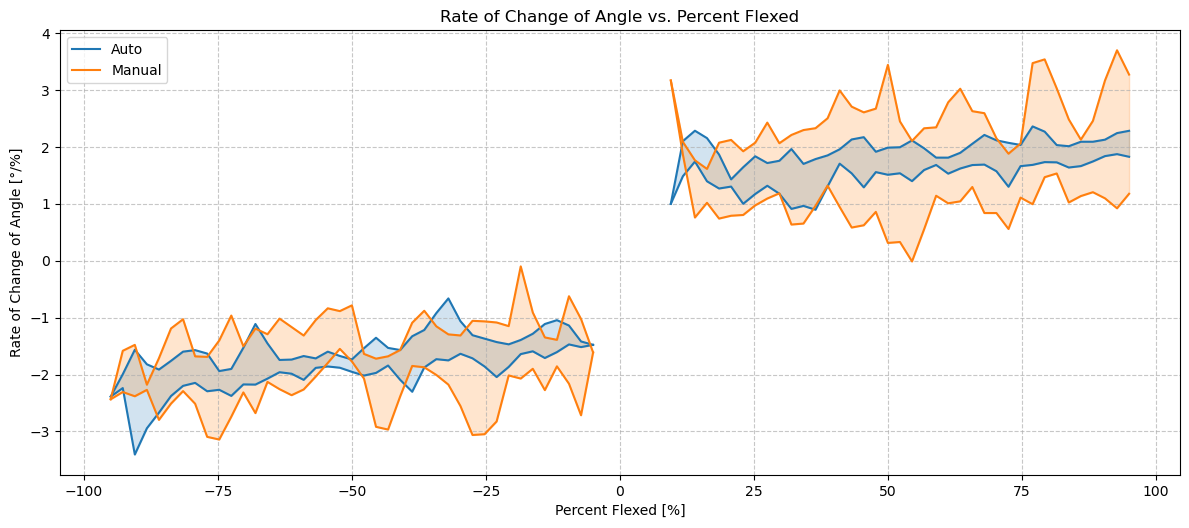

In [28]:
def process_data(data, x_range):
    val_mean = []
    val_std = []
    for x in x_range:
        val = []
        for id in range(len(datasets)):
            xind = np.where(data[id][0] == x)[0]
            if len(xind) > 0:
                val.append(data[id][1][xind][0])
        
        if val:
            val = np.array(val)
            val_mean.append(np.mean(val))
            val_std.append(np.std(val) if len(val) > 1 else 0)
        else:
            val_mean.append(np.nan)
            val_std.append(np.nan)
    
    val_mean = np.array(val_mean)
    val_std = np.array(val_std)
    
    # Remove NaN values
    mask = ~np.isnan(val_mean)
    x_range_filtered = x_range[mask]
    val_mean_filtered = val_mean[mask]
    val_std_filtered = val_std[mask]
    
    return x_range_filtered, val_mean_filtered, val_std_filtered

# Set up the plot
plt.figure(figsize=(12, 6))

# Process and plot left side data
x_range_left = np.linspace(-95, -5, 41)
x_auto_l, mean_auto_l, std_auto_l = process_data(data_auto_l, x_range_left)
x_manual_l, mean_manual_l, std_manual_l = process_data(data_manual_l, x_range_left)

# Process and plot right side data
x_range_right = np.linspace(5, 95, 41)
x_auto_r, mean_auto_r, std_auto_r = process_data(data_auto_r, x_range_right)
x_manual_r, mean_manual_r, std_manual_r = process_data(data_manual_r, x_range_right)

# Plot Auto data
plt.plot(x_auto_l, mean_auto_l + std_auto_l, color='tab:blue', label='Auto')
plt.plot(x_auto_l, mean_auto_l - std_auto_l, color='tab:blue')
plt.fill_between(x_auto_l, mean_auto_l + std_auto_l, mean_auto_l - std_auto_l, color='tab:blue', alpha=0.2)
plt.plot(x_auto_r, mean_auto_r + std_auto_r, color='tab:blue')
plt.plot(x_auto_r, mean_auto_r - std_auto_r, color='tab:blue')
plt.fill_between(x_auto_r, mean_auto_r + std_auto_r, mean_auto_r - std_auto_r, color='tab:blue', alpha=0.2)

# Plot Manual data
plt.plot(x_manual_l, mean_manual_l + std_manual_l, color='tab:orange', label='Manual')
plt.plot(x_manual_l, mean_manual_l - std_manual_l, color='tab:orange')
plt.fill_between(x_manual_l, mean_manual_l + std_manual_l, mean_manual_l - std_manual_l, color='tab:orange', alpha=0.2)
plt.plot(x_manual_r, mean_manual_r + std_manual_r, color='tab:orange')
plt.plot(x_manual_r, mean_manual_r - std_manual_r, color='tab:orange')
plt.fill_between(x_manual_r, mean_manual_r + std_manual_r, mean_manual_r - std_manual_r, color='tab:orange', alpha=0.2)

# Add labels and legend
plt.xlabel('Percent Flexed [%]')
plt.ylabel('Rate of Change of Angle [°/%]')
plt.title('Rate of Change of Angle vs. Percent Flexed')
plt.legend()

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust the plot layout
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
#

#%%
def draw_stick_figure(ax, x, y, leg_angle):
    body_length = 0.15
    leg_length = 0.1
    
    # Draw body
    ax.plot([x, x], [y, y + body_length], 'k-', linewidth=2)
    
    # Draw head
    ax.plot(x, y + body_length, 'ko', markersize=5)
    
    # Draw leg
    leg_end_x = x + leg_length * np.cos(np.radians(leg_angle))
    leg_end_y = y + leg_length * np.sin(np.radians(leg_angle))
    ax.plot([x, leg_end_x], [y, leg_end_y], 'k-', linewidth=2)

# Get the current axes
#ax = plt.gca()

# Draw stick figures
#draw_stick_figure(ax, -100, -0.2, 30)  # Flexed at -100%
#draw_stick_figure(ax, 0, -0.2, 0)      # Extended at 0%
#draw_stick_figure(ax, 100, -0.2, 30)   # Flexed at 100%


# Adjust the plot layout
plt.subplots_adjust(bottom=0.2)


# Save and show the plot
#plt.savefig('rate_of_change.svg', dpi=300)
plt.show()


In [29]:
conditions = ['Auto', 'Manual']
datasets = [1,2,3,4,5]

df_stats = pd.DataFrame(columns=['Auto - Mean','Auto - Std', 'Manual - Mean','Manual - Std'], index=[1,2,3,4,5])
for ds in datasets:
    for idc, con in enumerate(conditions):
        df_subset = df[(df['Dataset'] == ds) & (df['Condition'] == con)]
        df_stats.iloc[ds - 1, 0 + 2 * (con == 'Manual')] = np.mean(np.abs(df_subset['angle'].diff()))
        df_stats.iloc[ds - 1, 1 + 2 * (con == 'Manual')] = np.std(np.abs(df_subset['angle'].diff()))

df_stats['Auto - CV'] = df_stats['Auto - Std'] / df_stats['Auto - Mean'] * 100
df_stats['Manual - CV'] = df_stats['Manual - Std'] / df_stats['Manual - Mean'] * 100
display(df_stats)
print(np.mean(df_stats['Auto - CV']))
print(np.mean(df_stats['Manual - CV']))

df_stats.to_csv('cv_dataframe.csv', index=False)

,Auto - Mean,Auto - Std,Manual - Mean,Manual - Std,Auto - CV,Manual - CV
1,1.668576,0.377219,1.753934,0.982827,22.607229,56.035579
2,1.75732,0.809336,1.819828,1.066992,46.055132,58.6315
3,1.663479,0.543975,1.673573,0.871264,32.701069,52.060096
4,1.730175,0.560801,1.765343,1.252425,32.41297,70.945118
5,1.64148,0.597812,1.755036,1.050254,36.419106,59.842318


34.03910132521305
59.50292226416203


In [30]:
# Your original code to create the dataframe
conditions = ['Auto', 'Manual']
datasets = [1,2,3,4,5]
df_stats = pd.DataFrame(columns=['Auto - Mean','Auto - Std', 'Manual - Mean','Manual - Std'], index=[1,2,3,4,5])

# Assuming df is your original dataframe with 'Dataset', 'Condition', and 'angle' columns
for ds in datasets:
    for idc, con in enumerate(conditions):
        df_subset = df[(df['Dataset'] == ds) & (df['Condition'] == con)]
        df_stats.iloc[ds - 1, 0 + 2 * (con == 'Manual')] = np.mean(np.abs(df_subset['angle'].diff()))
        df_stats.iloc[ds - 1, 1 + 2 * (con == 'Manual')] = np.std(np.abs(df_subset['angle'].diff()))

df_stats['Auto - CV'] = df_stats['Auto - Std'] / df_stats['Auto - Mean'] * 100
df_stats['Manual - CV'] = df_stats['Manual - Std'] / df_stats['Manual - Mean'] * 100

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(datasets))
width = 0.35

auto_bars = ax.bar(x - width/2, df_stats['Auto - CV'], width, label='Auto', color='blue')
manual_bars = ax.bar(x + width/2, df_stats['Manual - CV'], width, label='Manual', color='orange')

ax.set_ylabel('Coefficient of Variation (%)')
ax.set_xlabel('Datasets')
ax.set_title('CV Comparison: Auto vs Manual')
ax.set_xticks(x)
ax.set_xticklabels(datasets)
ax.legend()

# Add value labels on top of each bar
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}%',
                ha='center', va='bottom')

add_value_labels(auto_bars)
add_value_labels(manual_bars)

# Adjust layout and save as SVG
plt.tight_layout()
plt.savefig('cv_comparison_chart.svg', format='svg')
plt.close()

print("Bar chart has been saved as 'cv_comparison_chart.svg'")

Bar chart has been saved as 'cv_comparison_chart.svg'


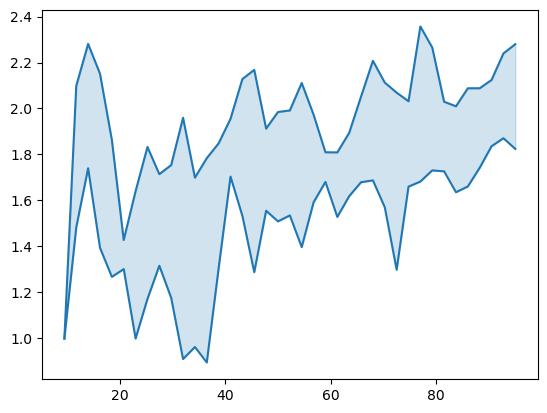